In [3]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [73]:
data_2019<-read.csv('data/2019.csv',header = T)
colnames(data_2019)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-','합계')
data_2019$`날짜`<-as.Date(data_2019$`날짜`,format='%Y.%m.%d')
#data_2019$요일 <- weekdays(data_2019$날짜)
data_2019$`23-`<-data_2019$`23-24`+data_2019$`24-`
data_2019 <- data_2019[,-(24:26)]
head(data_2019)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,2341,3370,3226,3447,3277,2898,2590,3004,2234,1008
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2360,2743,2491,2572,2060,1991,1683,1217,764,605
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,868,946,958,1062,1146,1119,992,904,570,217
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,875,964,733,746,606,374,311,268,177,201
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1294,1843,1870,2129,2024,1806,1796,1780,1296,528
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1771,1654,1379,1420,1050,685,431,315,237,201


In [77]:
# 24이후 column 버린다
data_2020<-read.csv('data/2020.csv',header = T,encoding = 'UTF-8')
colnames(data_2020)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-')
data_2020$`날짜`<-as.Date(data_2020$`날짜`,format='%Y.%m.%d')
data_2020$`23-`<-data_2020$`23-24`+data_2020$`24-`
data_2020<-data_2020[,-(24:25)]
head(data_2020)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,⋯,2065,2972,3194,3342,3002,2857,2311,2523,1830,1012
2,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,⋯,2308,2286,2354,2261,1922,1696,1620,1181,768,503
3,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,⋯,763,873,1019,1234,1383,1271,1061,991,572,219
4,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,⋯,1021,885,783,849,602,435,293,273,174,175
5,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,⋯,1190,1636,1748,1890,1879,1827,1955,1800,1259,412
6,2020-01-01,1호선,152,종각,하차,71,191,295,511,855,⋯,1439,1610,1450,1352,1132,725,545,344,225,171


In [78]:
data_2021<-read.csv('data/2021.csv',header = T,encoding = 'UFF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data_2021$`날짜`<-as.Date(data_2021$`날짜`,format='%Y.%m.%d')
head(data_2021)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,⋯,674,837,796,839,658,579,479,510,445,101
2,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,⋯,791,781,710,626,437,425,354,307,134,77
3,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,⋯,189,227,233,347,294,186,216,204,110,29
4,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,⋯,200,158,140,152,121,57,54,64,23,17
5,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,⋯,398,513,548,504,572,492,593,513,130,31
6,2021-01-01,1호선,152,종각,하차,34,116,178,304,391,⋯,480,432,478,415,274,117,75,72,29,19


In [90]:
data_all <- rbind(data_2019,data_2020,data_2021)
data_all$요일 <- weekdays(data_all$날짜)
head(data_all)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3370,3226,3447,3277,2898,2590,3004,2234,1008,화요일
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2743,2491,2572,2060,1991,1683,1217,764,605,화요일
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,946,958,1062,1146,1119,992,904,570,217,화요일
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,964,733,746,606,374,311,268,177,201,화요일
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1843,1870,2129,2024,1806,1796,1780,1296,528,화요일
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1654,1379,1420,1050,685,431,315,237,201,화요일


In [137]:
write.csv(data_all,'data/data.csv',row.names=F)

In [12]:
data<- read.csv('data/data.csv',encoding = 'UTF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data$합계 <-apply(data[,6:24],1,sum)
head(data)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일,합계
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3226,3447,3277,2898,2590,3004,2234,1008,화요일,39559
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2491,2572,2060,1991,1683,1217,764,605,화요일,31279
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,958,1062,1146,1119,992,904,570,217,화요일,11836
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,733,746,606,374,311,268,177,201,화요일,10359
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1870,2129,2024,1806,1796,1780,1296,528,화요일,21042
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1379,1420,1050,685,431,315,237,201,화요일,16750


In [31]:
corona <- read.csv('data/코로나동향.csv',header = T)

corona_new <- corona[,seq(1,53,2)]
corona_new$합계 <- apply(corona_new[,-1],1,sum)
corona_new$`자치구.기준일`<- as.Date(corona_new$`자치구.기준일`,format = '%Y.%m.%d')
head(corona_new)

,자치구.기준일,종로구.추가,중구.추가,용산구.추가,성동구.추가,광진구.추가,동대문구.추가,중랑구.추가,성북구.추가,강북구.추가,⋯,금천구.추가,영등포구.추가,동작구.추가,관악구.추가,서추구.추가,강남구.추가,송파구.추가,강동구.추가,기타.추가,합계
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2021-07-29,5,11,7,10,17,10,12,17,8,⋯,6,32,36,61,37,32,27,18,22,515
2,2021-07-28,6,9,14,9,25,12,21,16,12,⋯,19,27,35,55,19,39,34,27,32,573
3,2021-07-27,2,5,13,13,8,7,12,13,5,⋯,15,16,30,31,8,19,18,16,13,351
4,2021-07-26,4,7,7,14,12,8,6,11,12,⋯,11,22,15,30,13,24,13,20,14,341
5,2021-07-25,10,7,12,6,14,7,18,17,12,⋯,10,27,33,52,26,32,22,22,23,489
6,2021-07-24,4,9,15,16,18,8,25,8,17,⋯,13,13,30,40,21,32,34,18,24,465


Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <ec>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <9e>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <90>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <ec>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <b9>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <98>”
Warning message in title(...):
“conversion failure on 'corona_new[order(corona_new$자치구.기준일), ]$합계' in 'mbcsToSbcs': dot substituted for <ea>”
Warnin

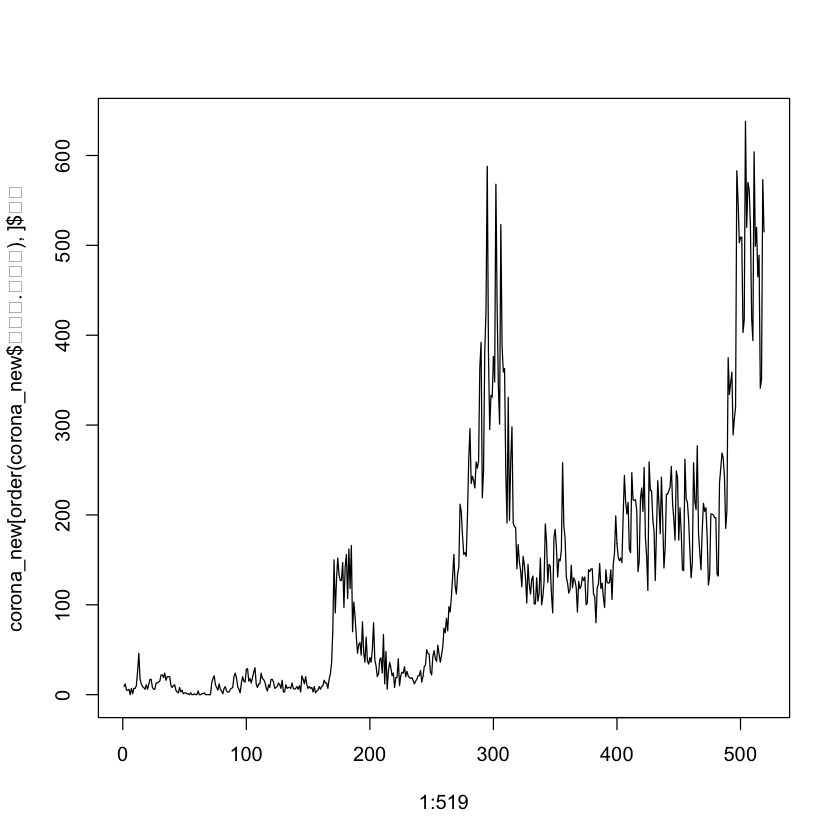

In [40]:
plot(1:519,corona_new[order(corona_new$`자치구.기준일`),]$합계,type='l')

In [ ]:
wilcoxo